In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("./data/InlineSkate_TRAIN.txt", sep="\s+", header=None)

In [3]:
df.columns = ['activity']+[i for i in range(1,1883)]

In [4]:
df.head()

,activity,1,2,3,4,5,6,7,8,9,...,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882
0,2.0,-0.036166,-0.151640,-0.089001,-0.133278,-0.077171,-0.117890,-0.081651,-0.092772,-0.093733,...,-0.140388,-0.152267,-0.183843,-0.165659,-0.149096,-0.155756,-0.180096,-0.127859,-0.192024,-0.110382
1,2.0,-0.554269,-0.593670,-0.579670,-0.602387,-0.604805,-0.601307,-0.604456,-0.632654,-0.620529,...,-0.466001,-0.462562,-0.492212,-0.469993,-0.495644,-0.493976,-0.531907,-0.498096,-0.537827,-0.517406
2,3.0,0.149520,0.026359,0.167522,0.054150,0.092847,0.085971,0.109042,0.105863,0.105697,...,0.407589,0.401735,0.413609,0.418236,0.401963,0.404071,0.403469,0.376418,0.367226,0.409763
3,7.0,-0.363134,-0.646226,-0.693991,-0.515547,-0.631538,-0.628675,-0.601326,-0.651290,-0.617221,...,-0.451168,-0.436118,-0.433549,-0.452010,-0.404250,-0.458801,-0.524101,-0.413477,-0.552416,-0.562536
4,6.0,0.090731,-0.092733,-0.026174,-0.064635,-0.089953,-0.062950,-0.079535,-0.083377,-0.101649,...,-0.050490,-0.049658,-0.062375,-0.073720,-0.097504,-0.103053,-0.082875,-0.143076,-0.078123,-0.142347


In [5]:
df.shape

(100, 1883)

In [6]:
from ipywidgets import interact
def update_plot(cat):
    ix=np.where(df.iloc[:,0]==cat)[0][0]
    df.iloc[ix,1:].plot()
    plt.title("Class: "+str(df.iloc[ix,0]))

In [7]:
interact(update_plot, cat=[1,2,3,4,5,6,7]);

interactive(children=(Dropdown(description='cat', options=(1, 2, 3, 4, 5, 6, 7), value=1), Output()), _dom_cla…

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
X_train=df.iloc[:,1:].values
X_train=MinMaxScaler().fit_transform(X_train)
y_train=np.ndarray.astype(df.iloc[:,0].values, np.int)

In [10]:
def model_evaluate(model, model_name):
    plt.figure(figsize=(10,7))
    X_new = model.fit_transform(X_train)
    sns.scatterplot(X_new[:,0], X_new[:,1], hue=y_train, palette='cubehelix')
    plt.title(model_name);

In [11]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold.t_sne import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import MDS

In [12]:
models = [
    (LocallyLinearEmbedding(n_components=7), 'Local Linear Embedding'), 
    (TSNE(n_components=3),'t-SNE'), 
    (Isomap(n_components=7),'Isomap'), 
    (MDS(n_components=7), 'MDS')
]

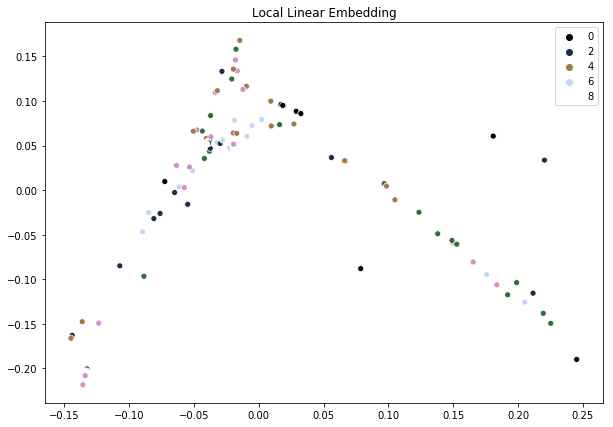

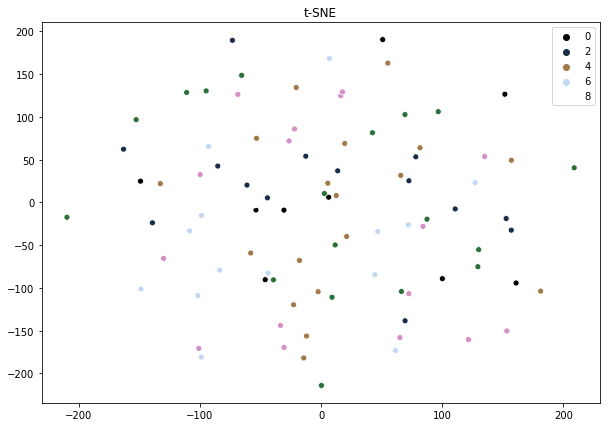

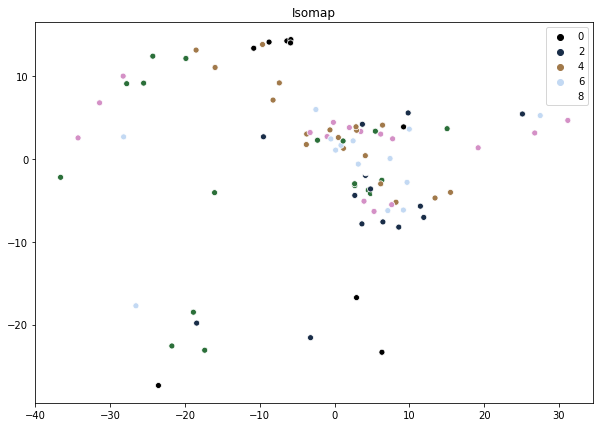

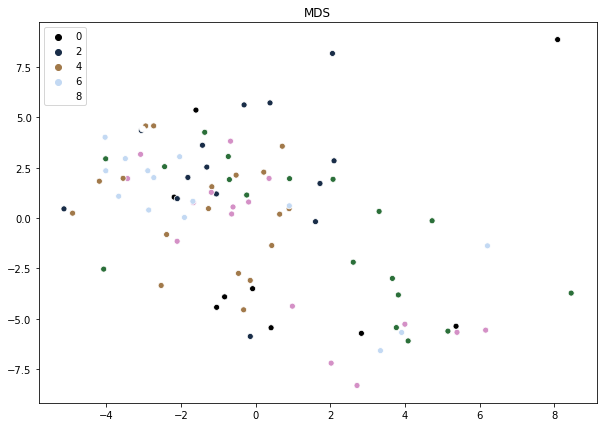

In [13]:
for model in models:
    model_evaluate(model[0],model[1])

In [14]:
from mpl_toolkits import mplot3d

def model_evaluate_3d(model, model_name):
    fig = plt.figure(figsize=(10,7))
    ax = plt.axes(projection='3d')
    X_new = model.fit_transform(X_train)
    ax.scatter3D(X_train[:,0], X_new[:,1], X_new[:,2], c=y_train, cmap='viridis');
    plt.title(model_name);

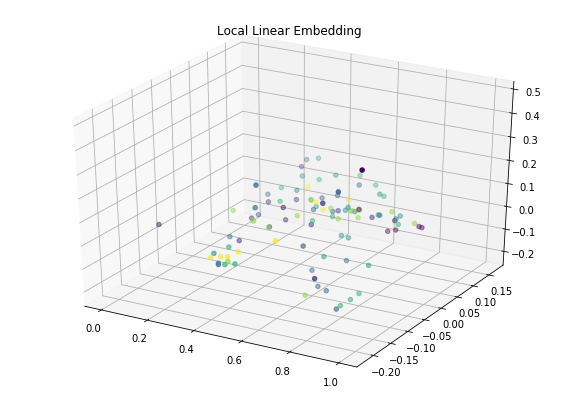

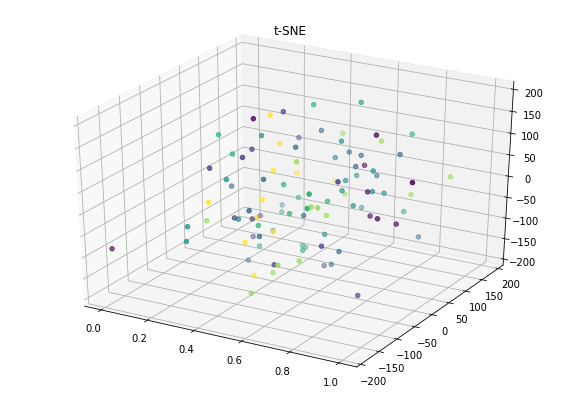

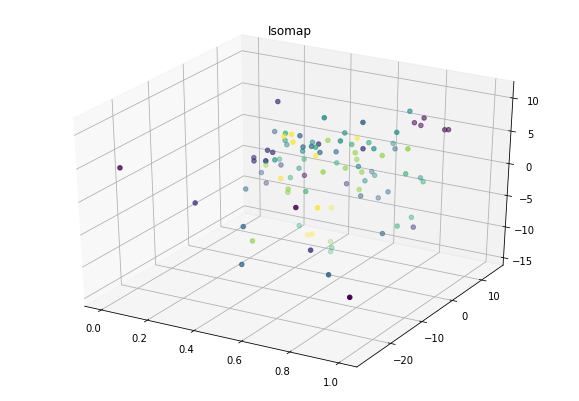

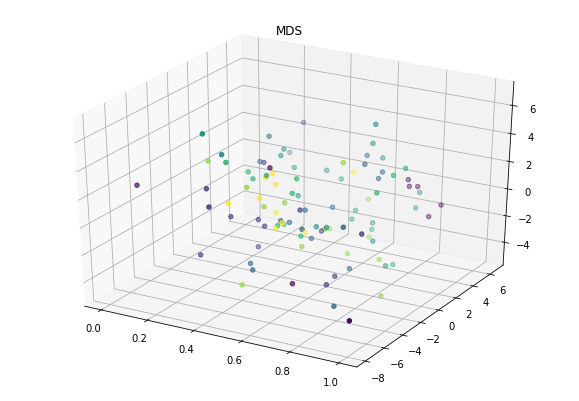

In [15]:
for model in models:
    model_evaluate_3d(model[0],model[1])